# Analytics Challegence - Rappi

__Author: Christian Camilo Urcuqui López__

__Date: 26 june 2019__



_Content_

+ [Part2-Experiment and metrics design](#Part2-Experiment-and-metrics-design)    
+ [Part3-Data analysis](#Part3-Data-analysis)
    + [Data description](#Data-description)
    + [Exploratory](#Exploratory)
    + [Modeling](#Modeling)

## Part2-Experiment and metrics design

__Contexto__

A new section in Rappi app where the users will have the possibility to choose coupons and discounts that they can redeem and use in their purchases. In the past, they used traditional channels (sms, email, push).  

The idea is to propose appropiate KPIs to measure the performance of the new feature and allow the UX team to make the best decision.

__Análisis__

Cada canal tradicional es un servicio que la app de Rappi ha utilizado para proveer la funcionalidad de redimir los cupones de los usuarios, estos servicios debieron también tener su respectivo KPI (el enunciado no tiene información de esto) ya que permitirá el estudio y el análisis de efectividad de los nuevos servicios. 

1. Propose and define the primary success metric of the redesigned app. What are 2-3 additional tracking metrics that will be important to monitor (in addition to the success metric defined above)?

Se pueden proponer distintos KPI para la funcionalidad de cupones y dependen de los objetivos del negocio y de los requerimientos del sistema (no funcionales), pero en mi opinión el principal seria el siguiente: _cantidad de solicitudes exitosas al servicio_. El anterior lo he propuesto ya que nos permitirá analizar cuál es el canal más utilizado, ya que me surge la duda si alguno de los canales tradicionales sería también efectivo frente a la nueva funcionalidad.  

Además, dependiendo del contexto del negocio yo evaluaría también los siguientes indicadores para el análisis de desempeño:

+ Cantidad de solicitudes realizadas al servicio
+ Tiempo promedio de envió y respuesta del servicio
+ Consumo de recursos del sistema por uso del servicio
    + CPU
    + RAM

También, incluiría métricas relacionadas con la seguridad del servicio desde la confidencialidad, integridad, disponibilidad:

+ Cantidad de solicitudes que expusieron información a terceros
+ Tiempo promedio en que el servicio no ha estado disponible 
+ Cantidad de quejas de usuarios de los datos suministrados durante la solicitud del servicio

Finalmente, evaluaria aspectos de interacción para brindarles mayor información al equipo  UX.

+ Cantidad de quejas de usuarios frente al uso de la funcionalidad
+ Tiempo promedio desde el ingreso de los datos hasta la solicitud del servicio
+ Tiempo promedio de despliegue de la respuesta de la funcionalidad de la app luego de recibir los datos de la solicitud 
+ Número de clientes fidelizados


2. Outline a testing plan to evaluate if the redesigned app performs better (according to the metrics you outlined). How would you balance the need to deliver quick results, with statistical rigor, and while still monitoring for risks?

Para la fase de pruebas emplearía un test A/B en una muestra de usuarios y analizaría cada uno de los KPI propuestos, realizando un énfasis sobre el primero y luego evaluando los riesgos a través de los restantes. Una vez realizadas las pruebas podría tener una respuesta más acertada sobre cuál es el canal (tradicional y nuevo) que es más utilizado.

Por otra parte, aprovecharía que el grupo de UX también pudiera analizar la interacción de los usuarios frente a usabilidad de la funcionalidad.

3. Explain how you would translate the results from the testing plan into a decision on whether to launch the new design or roll it back.

los resultados del testeo me permitirán comprobar cuál es la mejor funcionalidad (servicio o canal) y el diseño antes del despliegue ahorrando costos y reduciendo los riesgos.  Como mencione, no es claro si los canales tradicionales son o no efectivos, por lo tanto, con base al análisis de los datos podría tomar decisiones si seguir o mantener las versiones del sistema.

Además, a través de los KPI podría realizar planes de acción y estimar la eficiencia del sistema para futuros despliegues de funcionalidades. 



## Part3-Data analysis

_Context_

Rappi’s Operations team is interested in predicting which orders are more likely to be cancelled since they are not attractive enough for couriers. To solve this problem, we have provided a sample of orders created in September 2017

### Data description

| Columna name | Description   |
|------|------|
|  order_id  | Order ID|
|  store_id  | Store ID of the order|
|  to_user_distance  | Distance (km) between store and user location|
|  to_user_elevation  | Difference in meters between the store and user altitude (m.a.s.l.)|
|  total_earning  | Courier earning by delivering the order|
|  created_at  | Timestamp of order creation|
|  taken  | Takes the value of 1 if the order was taken by a courier, 0 otherwise|


### Exploratory

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). How many orders were not taken by any courier? What weekday has the higher percentage of non-taken orders? (2 points

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# libraries

import numpy 
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import dateutil.parser

In [4]:
# let's load the datasets
dataset = pd.read_csv("datasets/orders.csv")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146987 entries, 0 to 146986
Data columns (total 7 columns):
order_id             146987 non-null int64
store_id             146987 non-null int64
to_user_distance     146987 non-null float64
to_user_elevation    146987 non-null float64
total_earning        146987 non-null int64
created_at           146987 non-null object
taken                146987 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 7.9+ MB


Como podemos notar se cuentan con __146987 registros__ de los cuales a primera vista no presentan missing values.

In [9]:
dataset.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000,2017-09-07T20:07:23Z,0
3,14370258,900014452,2.671432,1.722656,4400,2017-09-07T20:15:19Z,1
4,14369923,900014085,0.965496,117.429199,3450,2017-09-07T20:12:14Z,1


Las variables independientes son numéricas y el objetivo es binaria. Por otra parte, podemos notar que la variable "to_user_elevation" tiene valores negativos y positivos.

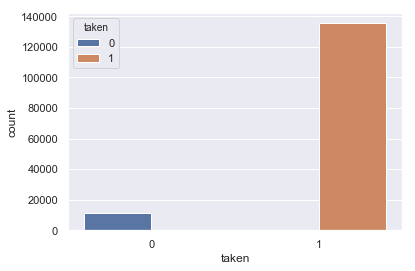

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="taken", data= dataset, hue="taken")

Del anterior histograma podemos notar la diferencia de los datos en la variable objetivo, es decir, hay un mayor cantidad de registros donde la orden fue tomada por un servicio. 

In [16]:
dataset.describe(include="all")

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
count,1.469870e+05,1.469870e+05,146987.000000,146987.000000,146987.000000,146987,146987.000000
unique,NaN,NaN,NaN,NaN,NaN,26914,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-09-23T19:06:05Z,NaN
freq,NaN,NaN,NaN,NaN,NaN,59,NaN
mean,1.507718e+07,7.580708e+08,1.501015,26.899130,5358.641594,NaN,0.921218
std,4.750119e+05,3.214280e+08,0.845776,84.907724,1779.800955,NaN,0.269400
min,1.421073e+07,3.000000e+07,0.000000,-598.296875,0.000000,NaN,0.000000
25%,1.466969e+07,9.000045e+08,0.836511,-18.348755,4200.000000,NaN,1.000000
50%,1.509241e+07,9.000077e+08,1.390230,11.145264,5200.000000,NaN,1.000000
75%,1.547355e+07,9.000127e+08,2.029955,61.024353,6300.000000,NaN,1.000000


Una interesante observación es que hay observaciones que tienen 0 de ganancia, posiblemente estos sean los registros que corresponde a _taken_ igual a 0, veamos si esto es cierto.

In [24]:
dataset[dataset.taken==0].describe(include="all")

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
count,1.158000e+04,1.158000e+04,11580.000000,11580.000000,11580.000000,11580,11580.0
unique,NaN,NaN,NaN,NaN,NaN,8109,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-09-07T11:59:05Z,NaN
freq,NaN,NaN,NaN,NaN,NaN,15,NaN
mean,1.507537e+07,7.772256e+08,1.754175,24.074973,5105.631347,NaN,0.0
std,4.838690e+05,3.027844e+08,0.840890,89.938155,1926.050521,NaN,0.0
min,1.421081e+07,3.000000e+07,0.000000,-580.946167,200.000000,NaN,0.0
25%,1.465511e+07,9.000052e+08,1.124350,-24.465881,3650.000000,NaN,0.0
50%,1.506805e+07,9.000091e+08,1.711255,8.925110,4700.000000,NaN,0.0
75%,1.553104e+07,9.000131e+08,2.292490,62.219635,6000.000000,NaN,0.0


In [25]:
dataset[dataset.taken==1].describe(include="all")

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
count,1.354070e+05,1.354070e+05,135407.000000,135407.000000,135407.000000,135407,135407.0
unique,NaN,NaN,NaN,NaN,NaN,26344,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-09-23T19:06:05Z,NaN
freq,NaN,NaN,NaN,NaN,NaN,50,NaN
mean,1.507733e+07,7.564327e+08,1.479365,27.140652,5380.279018,NaN,1.0
std,4.742482e+05,3.229208e+08,0.842673,84.459583,1765.056868,NaN,0.0
min,1.421073e+07,3.000000e+07,0.002776,-598.296875,0.000000,NaN,1.0
25%,1.467318e+07,9.000044e+08,0.816901,-17.841492,4200.000000,NaN,1.0
50%,1.509390e+07,9.000077e+08,1.362621,11.340210,5200.000000,NaN,1.0
75%,1.546836e+07,9.000127e+08,2.002647,60.902588,6400.000000,NaN,1.0


Efectivamente, existe pedidos que fueron tomados por un personal de Rappi que no tuvieron ganancias, veamos cuantos fueron:

In [33]:
dataset[(dataset.taken==1) & (dataset.total_earning == 0)][:]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
102163,14323700,900010714,1.388912,48.826538,0,2017-09-07T12:02:05Z,1


Se cuenta con solo un registro que no cuenta con ganancias, ya tocaría verificar con el negocio si este valor representa alguna campaña, algún cliente preferencial o algo particular. Para los siguientes análisis procederé  a tomar este registro como una __anomalía__. 

In [5]:
anomalia = dataset[(dataset.taken==1) & (dataset.total_earning == 0)][:].copy()

In [6]:
data = dataset[(dataset.total_earning != 0)][:].copy()

¿Existen datos atípicos?

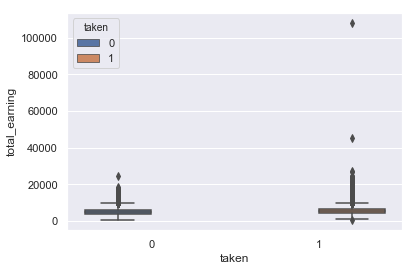

In [44]:
sns.boxplot(data=data, x="taken", y="total_earning", hue="taken")

Existen dos registros con ingresos superiores a 40000, ¿podrían ser clientes potenciales y que deberíamos tener en cuenta para futuros estudios?, estos datos los tendré como separados como un grupo de atípicos.

In [9]:
atipicos = data[(dataset.total_earning > 40000)][:].copy()
atipicos

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
8802,14421632,900013010,1.157337,-99.425781,45500,2017-09-08T17:32:07Z,1
83819,14731230,900007197,1.794446,-207.245483,108200,2017-09-14T13:38:08Z,1


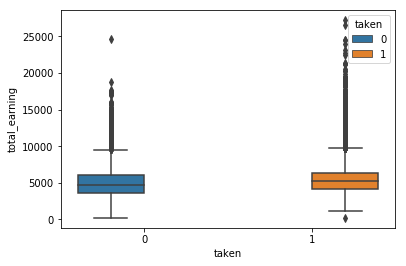

In [10]:
data = data[(dataset.total_earning < 40000)][:].copy()

sns.boxplot(data=data, x="taken", y="total_earning", hue="taken")

In [51]:
data.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,1.469840e+05,1.469840e+05,146984.000000,146984.000000,146984.000000,146984.000000
mean,1.507719e+07,7.580679e+08,1.501017,26.901434,5357.705274,0.921216
std,4.750087e+05,3.214306e+08,0.845784,84.905735,1756.314584,0.269402
min,1.421073e+07,3.000000e+07,0.000000,-598.296875,200.000000,0.000000
25%,1.466971e+07,9.000045e+08,0.836498,-18.348755,4200.000000,1.000000
50%,1.509245e+07,9.000077e+08,1.390234,11.145447,5200.000000,1.000000
75%,1.547356e+07,9.000127e+08,2.029977,61.029236,6300.000000,1.000000
max,1.590252e+07,9.000173e+08,9.360177,1009.380005,27200.000000,1.000000


Otra posible interesante observación es que existen registros donde prácticamente realizaron el pedido en la misma tienda, es decir, no tuvieron desplazamiento. Me surge la duda si existe alguna relación entre la distancia de la tienda y la ganancia total.

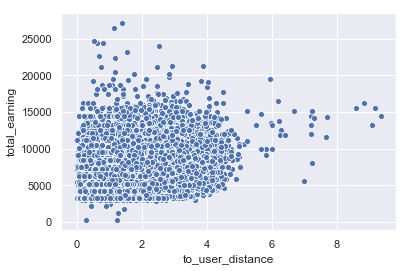

In [53]:
sns.scatterplot(data=data, x="to_user_distance", y="total_earning")

De la anterior visualización podemos ver que la concentración de los datos esta en la distancias más cortas 

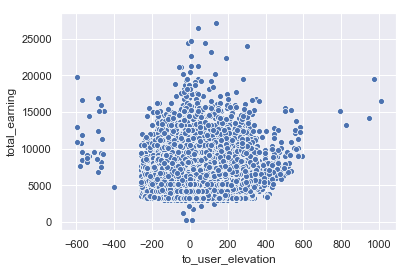

In [54]:
sns.scatterplot(data=data, x="to_user_elevation", y="total_earning")

Del anterior plot podríamos inferir que la concentración de las ganancias se encuentra en los registros donde la elevación esta entre -200 y 400 (m.a.s.l), para mí no es claro la forma de la captura de estos datos.

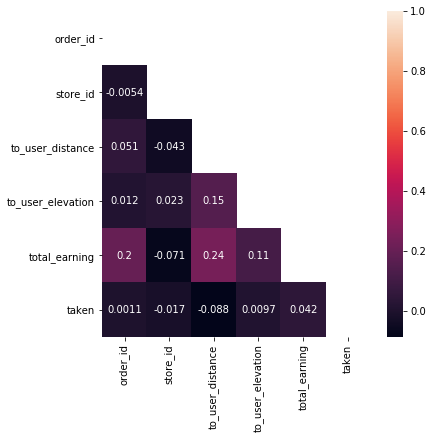

In [18]:
fig, ax = plot.subplots(figsize=(6, 6)) 
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data.corr(), mask= mask, ax= ax, annot= True)

Sin embargo, a través del análisis de la correlación entre las variables no existe una mayor influencia lineal entre estas. 

Veamos cual es el día que presenta un mayor porcentaje de ordenes no tomadas (taken=0).

In [58]:
date_weekday = []
for i in range(len(data.created_at)):
    d = dateutil.parser.parse(data.iloc[i].created_at)
    date_weekday.append(d.weekday())
serie  = pd.Series(date_weekday)    

In [61]:
data = data.assign(weekday=serie).copy()
data["weekday"] = data["weekday"].astype(str) 

In [111]:
pd.crosstab(data[data.taken==0].taken.values, data[data.taken==0].weekday.values, rownames=['ordenes'], colnames=['días']).apply(lambda r: r/r.sum(), axis=1)

días,0.0,1.0,2.0,3.0,4.0,5.0,6.0
ordenes,,,,,,,
0,0.113731,0.138256,0.11209,0.126598,0.162003,0.221762,0.125561


De la anterior tabla cruzada podemos ver que el día de la semana que más porcentaje (22%) de ordenes no tomadas es el sábado (5).

## Modeling

2. Build an analytical model to help Rappi determine whether or not an order is going to be taken by a courier. Discuss why you chose your approach, what alternatives you considered, and any concerns you may have. How valid is your model? Include any key indicators of model performance. (2 points)


Debido a que los registros de la variable objetivo no se encuentran balanceados, se tomará como prótocolo de entrenamiento y evaluación de los modelos la validación cruzada (cross-validation) con el fin de dar oportunidad a los datos valores con taken igual 0, con ello evitamos el under y el overfitting.

In [38]:
# libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.metrics import cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# seed
np.random.seed(128)

In [44]:
X = data.iloc[:,2:5]
Y = data.iloc[:,6]

Voy a lanzar un primero modelo de árboles de decisión con el tunning por defecto de la librería para conocer una primera aproximación

In [46]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
clf = tree.DecisionTreeClassifier()
scores = cross_validate(clf, X, Y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.70 (+/- 0.04)
score_time: 0.03 (+/- 0.00)
test_accuracy: 0.86 (+/- 0.00)
test_precision_weighted: 0.87 (+/- 0.00)
test_recall_weighted: 0.86 (+/- 0.00)
test_f1_weighted: 0.86 (+/- 0.00)


Nada mal comparado con el baseline de los datos desbalanceados, el primer modelo da un resultado de exactitud del _86%_.

Voy hacer un segundo experimento con KNN y Naive Bayes con el fin de comparar los resultados de los tres modelos.

_KNN_

In [47]:
ks=[1,3,5,7,9,11]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)    
    exactitudes = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    print("Exactitudes "+str(k)+": %0.2f (+/- %0.2f)" % (exactitudes.mean(), exactitudes.std() * 2))

Exactitudes 1: 0.86 (+/- 0.00)
Exactitudes 3: 0.90 (+/- 0.00)
Exactitudes 5: 0.91 (+/- 0.00)
Exactitudes 7: 0.92 (+/- 0.00)
Exactitudes 9: 0.92 (+/- 0.00)
Exactitudes 11: 0.92 (+/- 0.00)


_NB_

In [48]:
gnb = GaussianNB()
scores = cross_validate(gnb, X, Y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.02 (+/- 0.00)
score_time: 0.02 (+/- 0.00)
test_accuracy: 0.92 (+/- 0.00)
test_precision_weighted: 0.86 (+/- 0.01)
test_recall_weighted: 0.92 (+/- 0.00)
test_f1_weighted: 0.88 (+/- 0.00)


Podríamos inferir que tenemos dos modelos interesantes del 92% de exactitud, uno desde Naive Bayes (NB) y otro desde K vecinos cercanos, ambos tienen sus pros y contras dependiendo donde sea utilizado en producción, es decir, del volumen de datos y la variedad de la información, si nos encontramos con datos que no van a ser procesados en batch entonces mi recomendación sería utilizar el NB, por el contrario, el modelo que recomendaría a Rappi es un KNN con k igual 7.

Voy a realizar un último experimento con un hold-out, es decir, 80% para entrenamiento y el restante para testeo para el KNN con k igual 7, quiero ver otras métricas (matriz de confusión y kappa cohen)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12345, stratify=Y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("accuracy: {}".format(accuracy))
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

accuracy: 0.9179167942307038
              precision    recall  f1-score   support

           0       0.21      0.01      0.03      2316
           1       0.92      1.00      0.96     27081

    accuracy                           0.92     29397
   macro avg       0.56      0.50      0.49     29397
weighted avg       0.87      0.92      0.88     29397

COHEN
0.0171085149792205


Definitivamente podemos rectificar que el hold-out no es una buena aproximación, el modelo basado en KNN tienen una buena exactitud, pero se queda en la precisión de los datos con _take_ igual a 0, esto lo podemos confirmar con el valor de kappa ya que es muy próximo a 0.

3. Briefly discuss how Rappi can take advantage of the insights gained from the model to increase the number orders taken by our couriers. (1 point)


Independiente de la fecha, el modelo cuenta con la capacidad de predecir con un 92% de exactitud si una orden va a ser tomada por un personal de la compañía a partir de la distancia, la elevación y la cantidad de la ganancia donde se solicita el pedido. Este es el principal insight ya que permitirá a Rappi realizar campañas de atracción a clientes o mejorar la logística de la ubicación de los proveedores de servicio y así atraer a nuevos clientes (hace parte de los KPI propuestos)